In [1]:
# importar librerías de Pandas y Numpy
import pandas as pd
import numpy as np

# importar librerías de visualización
import seaborn as sns
import matplotlib.pyplot as plt

# librerías para análisis estadísticos tests
import scipy.stats as stats
from scipy.stats import shapiro, kstest, ttest_ind, mannwhitneyu, expon, chisquare, levene, chi2_contingency

# visualizar todas las columnas del dataframe
pd.set_option("display.max_columns", None)

In [2]:
df=pd.read_csv("HR RAW DATA_CLEAN_Ele.csv", index_col=0)
df.head(2)

,EmployeeNumber,Age,Gender,Education,EducationField,NumCompaniesWorked,JobLevel,JobRole,Department,JobInvolvement,PerformanceRating,Attrition,JobSatisfaction,EnvironmentSatisfaction,RelationshipSatisfaction,WorkLifeBalance,MonthlyIncome,StockOptionLevel,PercentSalaryHike,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,TrainingTimesLastYear,BusinessTravel,DistanceFromHome,OverTime,RemoteWork
0,"162,0",51,Male,3,NaN,7,5,Research Director,Unknown,3,3,No,3,1.0,3,3,19537.0,0,13,20,15,15,5,non-travel,6,No,Yes
1,"259,0",52,Male,4,Life Sciences,0,5,Manager,Unknown,2,3,No,3,3.0,1,3,19999.0,1,14,33,11,9,5,non-travel,1,No,Yes



# A/B testing

### Nuestra misión es identificar factores clave que influyen en la satisfacción en el trabajo y, en última instancia, en la retención de empleados

#### El problema de A/B-Testing que se nos plantea tiene el objetivo de determinar si existe una relación entre el nivel de satisfacción en el trabajo y la rotación de empleados

#### Partiremos de la siguiente hipótesis: "Existe una relación entre el nivel de satisfacción en el trabajo y la rotación de empleados en la empresa. Se sospecha que los empleados con niveles de satisfacción más bajos tienen una mayor probabilidad de dejar la empresa".

##### Para ello deberéis crear una columna nueva en base al nivel de satisfacción en el trabajo para crear dos grupos, las condiciones para crear los grupos son:

##### **Grupo A (Control)**: Empleados con un nivel de satisfacción en el trabajo igual o superior a 3 en una escala de 1 a 5

##### **Grupo B (Variante)**: Empleados con un nivel de satisfacción en el trabajo inferior a 3 en la misma escala.

#### La **métrica principal** que debes usar es la **tasa de rotación de empleados** (```Attrition```) en cada grupo. 

#### Recordemos que, en esta columna, **"No"** indica que el empleado no ha dejado la empresa (sin rotación), mientras que **"Yes"** indica que el empleado ha dejado la empresa (con rotación).

#### Por lo tanto, los pasos que deberás seguir en esta fase son:
1. Divide a los empleados en los grupos A y B según los criterios establecidos.

2. Calcula la tasa de rotación (porcentaje de empleados que dejaron la empresa) en cada grupo.

3. Realiza un análisis estadístico para determinar si hay una diferencia significativa en la tasa de rotación entre los grupos A y B.

4. Analiza los resultados.

5. Calcula la magnitud de esta relación utilizando estadísticas como la diferencia de medias por ejemplo.

In [ ]:
# Exploración de las columnas con información sobre "satisfaction"

# Según la descripción proporcionada de los datos, hay 3 columnas relacionadas con la "satisfacción" del personal en el trabajo:

#1. EnvironmentSatisfaction: Nivel de satisfacción del empleado en relación con su entorno de trabajo. 
# Con valores que estan comprendidos entre el 1 y el 4, siendo el 4 el nivel de máxima satisfacción.

#2. JobSatisfaction: Nivel de satisfacción del empleado con su trabajo, valores entre el 1 y el 4.

#3. RelationshipSatisfaction: Nivel de satisfacción en las relaciones interpersonales del empleado. valores entre el 1 y el 4


In [3]:
# Vamos a hacer un df específico, y ver estadísticos

df_satisfaction = df[["RelationshipSatisfaction", "JobSatisfaction", "EnvironmentSatisfaction"]]
round(df_satisfaction.describe(),2)

# comprobamos que tras la limpieza y transformación de dichos apartados, las tres variables tienen los rangos
# apropiados

,RelationshipSatisfaction,JobSatisfaction,EnvironmentSatisfaction
count,1486.00,1486.00,1486.00
mean,2.71,2.73,2.74
std,1.08,1.10,1.06
min,1.00,1.00,1.00
25%,2.00,2.00,2.00
50%,3.00,3.00,3.00
75%,4.00,4.00,4.00
max,4.00,4.00,4.00


In [4]:
# Vamos a generar una nueva columna en el df con la media por empleado de las tres variables de satisfacción
df_satisfaction.loc[:,"mean_satisfaction"]=(df["RelationshipSatisfaction"]+df["JobSatisfaction"]+df["EnvironmentSatisfaction"])/3

#estadísticos
df_satisfaction["mean_satisfaction"].describe()

/Users/Elena/anaconda3/envs/py39/lib/python3.9/site-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


count    1486.000000
mean        2.725213
std         0.623469
min         1.000000
25%         2.333333
50%         2.666667
75%         3.333333
max         4.000000
Name: mean_satisfaction, dtype: float64

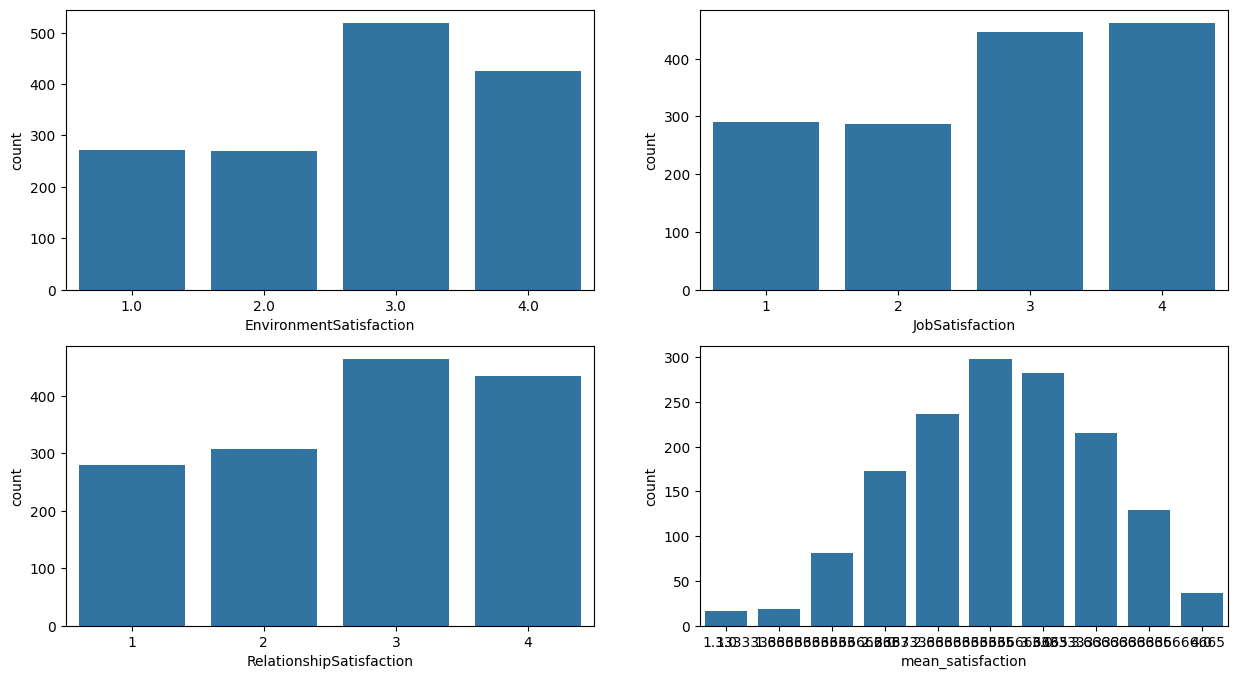

In [5]:
# Countplots para ver visualmente las distribuciones
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15,8))

#df_data["EnvironmentSatisfaction"]

sns.countplot(data=df, x= "EnvironmentSatisfaction", ax=axes[0,0])
sns.countplot(data=df, x= "JobSatisfaction", ax=axes[0,1])
sns.countplot(data=df, x= "RelationshipSatisfaction", ax=axes[1,0])
sns.countplot(data=df_satisfaction, x= "mean_satisfaction", ax=axes[1,1])

plt.tight_layout;

In [6]:
# añadimos la columna de la media de las 3 "Satisfactions" al df original

df.insert(15, "MeanSatisfaction", df_satisfaction["mean_satisfaction"],allow_duplicates=False)

df.head(2)

,EmployeeNumber,Age,Gender,Education,EducationField,NumCompaniesWorked,JobLevel,JobRole,Department,JobInvolvement,PerformanceRating,Attrition,JobSatisfaction,EnvironmentSatisfaction,RelationshipSatisfaction,MeanSatisfaction,WorkLifeBalance,MonthlyIncome,StockOptionLevel,PercentSalaryHike,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,TrainingTimesLastYear,BusinessTravel,DistanceFromHome,OverTime,RemoteWork
0,"162,0",51,Male,3,NaN,7,5,Research Director,Unknown,3,3,No,3,1.0,3,2.333333,3,19537.0,0,13,20,15,15,5,non-travel,6,No,Yes
1,"259,0",52,Male,4,Life Sciences,0,5,Manager,Unknown,2,3,No,3,3.0,1,2.333333,3,19999.0,1,14,33,11,9,5,non-travel,1,No,Yes


In [7]:
# Vamos ahora a explorar "Attrition"

df["Attrition"].value_counts()

print(f'Han dejado la empresa {df["Attrition"].value_counts()[1]} empleados, y permanenen {df["Attrition"].value_counts()[0]} empleados')

Han dejado la empresa 237 empleados, y permanenen 1249 empleados


In [8]:
# tabla contingencia entre "Attrition" y "JobSatisfaction"
# Esta tabla nos da los % de cada una de las combinaciones de estas dos variables

table_JS = pd.crosstab(df["Attrition"], df["JobSatisfaction"], normalize=True)*100
round(table_JS,2)


JobSatisfaction,1,2,3,4
Attrition,,,,
No,15.14,16.22,25.10,27.59
Yes,4.44,3.10,4.91,3.50


In [9]:
# tabla contingencia entre "Attrition" y "EnvironmentSatisfaction"
# Esta tabla nos da los % de cada una de las combinaciones de estas dos variables

table_ES = pd.crosstab(df["Attrition"], df["EnvironmentSatisfaction"], normalize=True)*100
round(table_ES,2)

EnvironmentSatisfaction,1.0,2.0,3.0,4.0
Attrition,,,,
No,13.73,15.28,30.28,24.76
Yes,4.51,2.89,4.64,3.90


In [10]:
# tabla contingencia entre "Attrition" y "RelationshipSatisfaction"
# Esta tabla nos da los % de cada una de las combinaciones de estas dos variables

table_RS = pd.crosstab(df["Attrition"], df["RelationshipSatisfaction"], normalize=True)*100
round(table_RS,2)

RelationshipSatisfaction,1,2,3,4
Attrition,,,,
No,15.01,17.63,26.45,24.97
Yes,3.84,3.03,4.78,4.31


In [11]:
# tabla contingencia entre "Attrition" y "MeanSatisfaction"

table_MS = pd.crosstab(df["Attrition"], df["MeanSatisfaction"], normalize=True)*100
round(table_MS,2).T

# esta tabla muestra los porcentajes de empleados en cada combinación de las dos variables, en este caso 
# usando MeanSatisfaction en lugar de JobSatisfaction

Attrition,No,Yes
MeanSatisfaction,,
1.000000,0.61,0.47
1.333333,0.54,0.74
1.666667,4.04,1.41
2.000000,9.49,2.15
2.333333,13.06,2.89
2.666667,17.29,2.76
3.000000,16.42,2.56
3.333333,12.72,1.75
3.666667,7.60,1.08


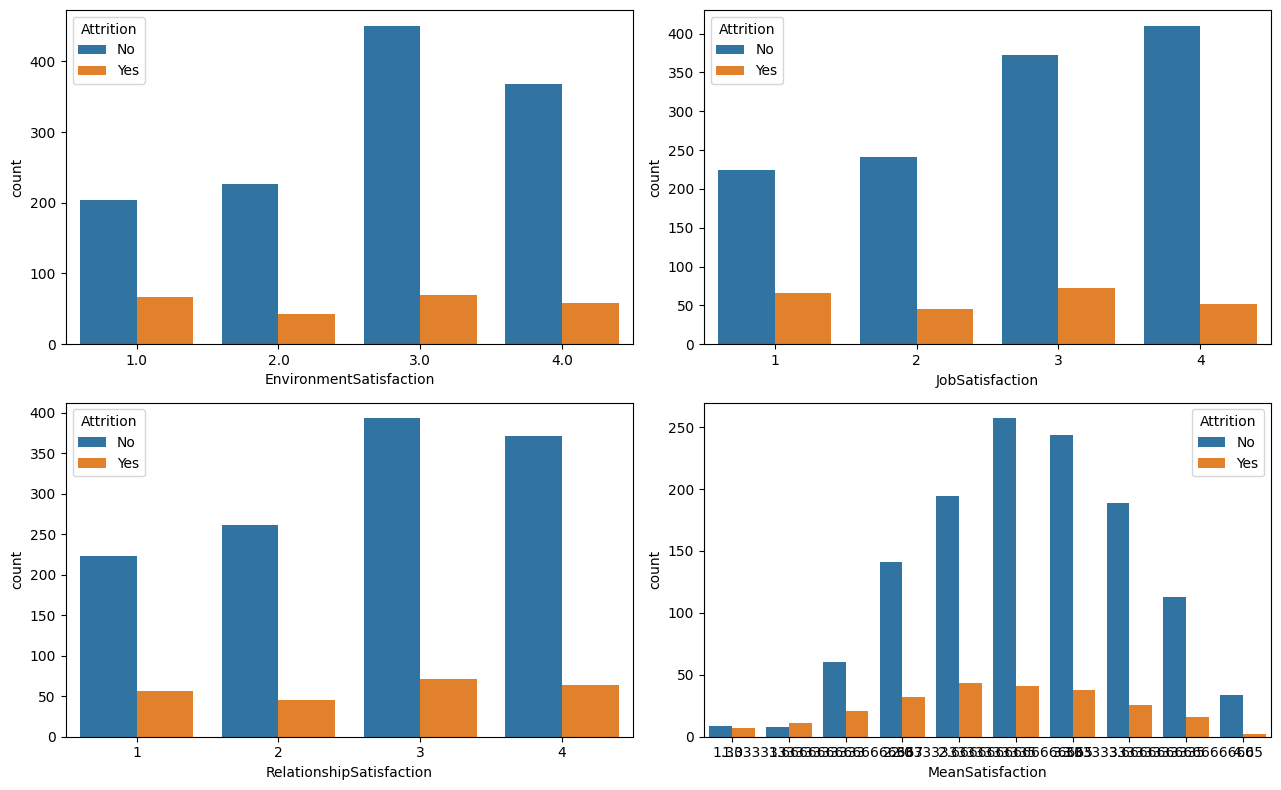

In [12]:
# Las mismas figuras de arriba , pero añadiendo "Attrition como hue
figs, axes = plt.subplots(nrows=2, ncols=2, figsize=(13,8))

sns.countplot(data=df, x="EnvironmentSatisfaction", hue="Attrition", dodge=True, ax=axes[0,0])
sns.countplot(data=df, x="JobSatisfaction", hue="Attrition", dodge=True, ax=axes[0,1])
sns.countplot(data=df, x="RelationshipSatisfaction", hue="Attrition", dodge=True, ax=axes[1,0])
sns.countplot(data=df, x="MeanSatisfaction", hue="Attrition", dodge=True, ax=axes[1,1])

plt.tight_layout();

# Visualmente ya se observan diferencias en las proporciones relativas entre los empleados que dejan la empresa 
# y los que no para los distintos niveles de satisfacción media
# Vamos a hacer las pruebas estadísticas para verificar si hay diferencias significativas

#### 1. Divide a los empleados en los grupos A y B según los criterios establecidos.

In [13]:
#explorar la distribución de valores en "MeanSatisfaction"
df["MeanSatisfaction"].value_counts()

# Hemos valorado que "MeanSatisfaction", que incluye la media de los valores de "EnvironmentSatisfaction", 
# "JobSatisfaction" y "RelationshipSatisfaction" es la que mejor representa la "satisfacción global" de 
# cada empleado en esta empresa. 
# Por ello, los grupos que hemos hecho son:

# 1. Grupo A (Control) : Empleados con un nivel de "MeanSatisfaction" >= a 2.5.

# 2. Grupo B (Variante) : Empleados con un nivel de "MeanSatisfaction" <2.5.

2.666667    298
3.000000    282
2.333333    237
3.333333    215
2.000000    173
3.666667    129
1.666667     81
4.000000     36
1.333333     19
1.000000     16
Name: MeanSatisfaction, dtype: int64

In [14]:
# añadimos una nueva columna al lado de MeanSatisfaction para poder hacer la distinción A/B. 
# La hemos llamado "MeanSatisfaction_A_B"

df.insert(16, "MeanSatisfaction_A_B", df["MeanSatisfaction"],allow_duplicates=False)

df.head(2)

,EmployeeNumber,Age,Gender,Education,EducationField,NumCompaniesWorked,JobLevel,JobRole,Department,JobInvolvement,PerformanceRating,Attrition,JobSatisfaction,EnvironmentSatisfaction,RelationshipSatisfaction,MeanSatisfaction,MeanSatisfaction_A_B,WorkLifeBalance,MonthlyIncome,StockOptionLevel,PercentSalaryHike,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,TrainingTimesLastYear,BusinessTravel,DistanceFromHome,OverTime,RemoteWork
0,"162,0",51,Male,3,NaN,7,5,Research Director,Unknown,3,3,No,3,1.0,3,2.333333,2.333333,3,19537.0,0,13,20,15,15,5,non-travel,6,No,Yes
1,"259,0",52,Male,4,Life Sciences,0,5,Manager,Unknown,2,3,No,3,3.0,1,2.333333,2.333333,3,19999.0,1,14,33,11,9,5,non-travel,1,No,Yes


In [15]:
# En esta columna nueva, que es una copia de "MeanSatisfaction", sustituiremos los valores iguales o superiores a 2.5 por "A", 
# y el resto por "B", dividiendo en la práctica el DF en un grupo A y un grupo B
df["MeanSatisfaction_A_B"] = df["MeanSatisfaction"].apply(lambda x:"A" if x>= 2.5 else "B")
df.head(2)

,EmployeeNumber,Age,Gender,Education,EducationField,NumCompaniesWorked,JobLevel,JobRole,Department,JobInvolvement,PerformanceRating,Attrition,JobSatisfaction,EnvironmentSatisfaction,RelationshipSatisfaction,MeanSatisfaction,MeanSatisfaction_A_B,WorkLifeBalance,MonthlyIncome,StockOptionLevel,PercentSalaryHike,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,TrainingTimesLastYear,BusinessTravel,DistanceFromHome,OverTime,RemoteWork
0,"162,0",51,Male,3,NaN,7,5,Research Director,Unknown,3,3,No,3,1.0,3,2.333333,B,3,19537.0,0,13,20,15,15,5,non-travel,6,No,Yes
1,"259,0",52,Male,4,Life Sciences,0,5,Manager,Unknown,2,3,No,3,3.0,1,2.333333,B,3,19999.0,1,14,33,11,9,5,non-travel,1,No,Yes


In [16]:
# comprobamos que se ha hecho bien

df["MeanSatisfaction_A_B"].value_counts()

A    960
B    526
Name: MeanSatisfaction_A_B, dtype: int64

### 2. Calcula la tasa de rotación (% de empleados que dejaron la empresa) en cada grupo

In [17]:
# Tasa de Rotacion por grupo

# creamos dos dfs individuales dividiendo los empleados del grupo A y los del B
subdf_A = df[df["MeanSatisfaction_A_B"]=="A"]
subdf_B = df[df["MeanSatisfaction_A_B"]=="B"]

# La tasa de rotación es el % de empleados de cada grupo (A o B) que han abandonado la empresa ("Attrition"=Yes)
tasa_rotacion_A = subdf_A[subdf_A["Attrition"]=="Yes"].shape[0]/subdf_A.shape[0]*100
tasa_rotacion_B = subdf_B[subdf_B["Attrition"]=="Yes"].shape[0]/subdf_B.shape[0]*100

print(f'La tasa de rotación en el grupo A es de {round(tasa_rotacion_A, 2)}%')
print(f'La tasa de rotación en el grupo B es de {round(tasa_rotacion_B, 2)}%')

# Estos porcentajes también son sugestivos de que sí hay una importante diferencia entre los grupos
# y de que la satisfacción influye significativamente en si los empleados permanecen o no en la empresa

La tasa de rotación en el grupo A es de 12.81%
La tasa de rotación en el grupo B es de 21.67%


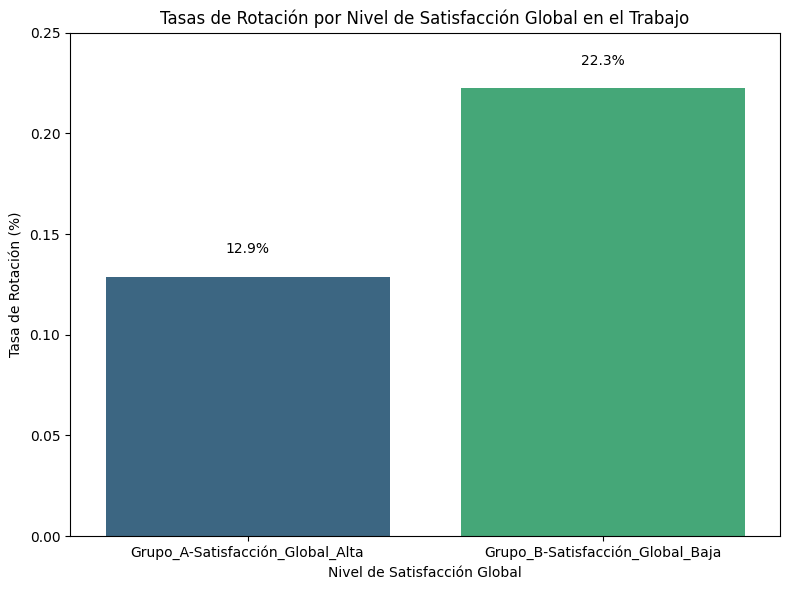

In [18]:
# realizar un figura para verlo gráficamente

# tasas de rotación para los dos grupos
satisfaction_levels = ['Grupo_A-Satisfacción_Global_Alta', 'Grupo_B-Satisfacción_Global_Baja']
tasas_rotacion = [0.1289, 0.2226]  

# Crear gráfico de barras
plt.figure(figsize=(8, 6))
sns.barplot(x=satisfaction_levels, hue=satisfaction_levels, y=tasas_rotacion, palette='viridis')

# Ajustar límite del eje Y para dejar más espacio
plt.ylim(0, 0.25)

# Añadir títulos y etiquetas
plt.title('Tasas de Rotación por Nivel de Satisfacción Global en el Trabajo')
plt.xlabel('Nivel de Satisfacción Global')
plt.ylabel('Tasa de Rotación (%)')

# Añadir los valores encima de las barras
for i, rate in enumerate(tasas_rotacion):
    plt.text(i, rate + 0.01, f'{rate*100:.1f}%', ha='center', va='bottom', fontsize=10)

plt.tight_layout();


In [19]:
# Para comprobar si hay una asociación significativa entre las variables "MeanSatisfaction_A_B" y "Attrition", 
# que son ambas categóricas, usaremos el test chi-cuadrado

# Crear una tabla de contingencia entre los grupos A/B y la variable "Attrition"
# table_cont_MS_AB: tabla de contingencia con Mean Satisfaction y Attritiony los grupos A y B

table_cont_MS_AB = pd.crosstab(df['MeanSatisfaction_A_B'], df['Attrition'])
table_cont_MS_AB

# En esta tabla vemos los numeros de empleados en cada una de las combinaciones de las dos variables. 
# Es decir, en el grupo A hay 837 empleados que no dejaron la empresa y 123 que sí. 
# En el grupo B, los empleados que se mantienen en la empresa son 412 y los que la abandonaron 114

Attrition,No,Yes
MeanSatisfaction_A_B,,
A,837,123
B,412,114


In [20]:
# Realizar el test de Chi-cuadrado

chi2, p, _, _ = chi2_contingency(table_cont_MS_AB)

# Resultados
print(f"Chi-cuadrado: {round(chi2,2)}")
print(f"P-valor: {p}")

# Interpretación
if p < 0.05:
    print(f'El p_valor de este test es {p}, muy inferior a 0.05')
    print("Existen diferencias significativas entre los grupos")
else:
    print(f'El p_valor de este test es {p}, superior a 0.05')
    print("No se encontraron diferencias significativas entre los grupos.")

# El análisis estadístico indica que sí existen diferencias significativas entre los valores de la tabla de contingencia.

Chi-cuadrado: 19.25
P-valor: 1.1492107874501547e-05
El p_valor de este test es 1.1492107874501547e-05, muy inferior a 0.05
Existen diferencias significativas entre los grupos


#### 5. Calcula la magnitud de esta relación utilizando estadísticas como la diferencia de medias, por ejemplo.

In [ ]:
# Para calcular la magnitud de esta relación, dado que tenemos dos variables categóricas, realizaremos 
# un cálculo de Odds Ratio, que nos permite comparar las probabilidades de un evento 
# (en este caso, abandonar la empresa) entre dos grupos (Grupo A y Grupo B).

# Para calcular el OR, podemos considerar "Attrition"=Yes como "exito" y "Attrition"=No como "fracaso", 
# con lo que se formarían 4 grupos:
#   - Fracaso en Grupo A 
#   - Éxito en Grupo A 
#   - Fracaso en Grupo B 
#   - Éxito en Grupo B 

#Interpretación del Odds Ratio:
#OR = 1: No hay asociación entre la exposición (la categoría de satisfacción) y el resultado. 
#        Las probabilidades son iguales para ambos grupos.

#OR > 1: La exposición (que sería estar en el grupo con menor satisfacción) se asocia 
#        con una mayor probabilidad de éxito (abandono de la empresa).

#OR < 1: La exposición se asocia con una menor probabilidad de éxito.

In [21]:
tabla_contingencia = pd.crosstab(df['MeanSatisfaction_A_B'], df['Attrition'])
tabla_contingencia

Attrition,No,Yes
MeanSatisfaction_A_B,,
A,837,123
B,412,114


In [22]:
# Para calcular el OR es necesario crear una tabla de contingencia entre las dos variables de interés
# Crear tabla de contingencia
tabla_contingencia = pd.crosstab(df['MeanSatisfaction_A_B'], df['Attrition'])

# Extraer valores de la tabla para calcular OR
a = tabla_contingencia.iloc[0, 0]  # Fracaso en Grupo A
b = tabla_contingencia.iloc[0, 1]  # Éxito en Grupo A
c = tabla_contingencia.iloc[1, 0]  # Fracaso en Grupo B
d = tabla_contingencia.iloc[1, 1]  # Éxito en Grupo B

# Calcular Odds Ratio
odds_ratio = (a * d) / (b * c)

print(f"Odds Ratio: {round(odds_ratio,2)}")

# En esta situación el Odds Ratio (OR) nos dice precisamente cuánto más probable es que un trabajador con baja satisfacción global abandone 
# la empresa en comparación con uno con alta satisfacción.


Odds Ratio: 1.88


In [23]:
# A mayores, se suele calcular el intervalo de confianza (IC) para el Odds Ratio. 
# Este intervalo de confianza permite evaluar si la Odds Ratio es significativamente diferente de 1 
# (OR = 1 implicaría que no hay diferencia entre los grupos).

# Calcular Intervalo de confianza para la Odds Ratio: 

# Calcular logaritmo de la OR
log_or = np.log(odds_ratio)

# Calcular el error estándar de log(OR)
se_log_or = np.sqrt(1/a + 1/b + 1/c + 1/d)

# Calcular intervalo de confianza con un nivel de confianza del 95%
ci_lower = np.exp(log_or - 1.96 * se_log_or)
ci_upper = np.exp(log_or + 1.96 * se_log_or)

print(f"Odds Ratio: {round(odds_ratio,2)}")
print(f"95% Intervalo de Confianza: ({round(ci_lower,2)}, {round(ci_upper,2)})")

# Si el intervalo de confianza para la Odds Ratio no incluye 1, se confirma que la diferencia entre los grupos 
# es significativa. Si incluyera 1, no se puede concluir que haya una diferencia significativa.


Odds Ratio: 1.88
95% Intervalo de Confianza: (1.42, 2.49)


In [ ]:
# Nuestra hipótesis y, lo que queríamos averiguar al realizar el estudio de A/B testing, era si 
# "Existe una relación entre el nivel de satisfacción en el trabajo y la rotación de empleados en la empresa. 
# 
# Se sospecha que los empleados con niveles de satisfacción más bajos tienen una mayor probabilidad de dejar la empresa".

# Con el estudio estadistico que hemos realizado se concluye que los empleados con baja satisfaccion tienen una probabilidad de 
# abandono 1.88 veces superior que la probabilidad de abandono entre los trabajadores con mayor satisfacción. 

# En otras palabras, los empleados con baja satisfacción son aproximadamente un 88% más propensos a dejar la empresa que aquellos con alta satisfacción.
# un 1.88 



In [24]:
df.to_csv("HR RAW DATA_CLEAN_Ele_v02.csv")